# Lab 1: Elementary Music Synthesis

## Christian Lancaster and Jade Cutter

### EE 341, Summer 2020
----

## Task 1  Generating musical note

### Import necessary packages

In [265]:
import matplotlib.pyplot as plt
import simpleaudio as sa
import numpy as np

### Create single note

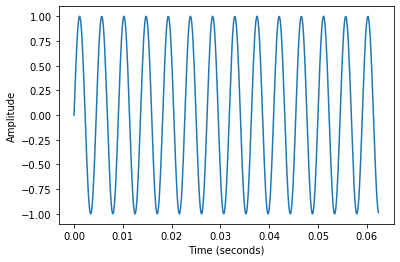

In [266]:
t = np.linspace(0,1,8000)
f = 220
note = np.sin(2*np.pi*f*t)
plt.plot(t[:500],note[:500]) #plots first 500 samples
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
sa.play_buffer((32767*note).astype('int16'), 1, 2, 8000).wait_done()

### Create multiple notes

In [267]:
notes = []
freq = 220.0
for i in range(0,10,1):
    t = np.linspace(0, 1, 1*8000)
    current_freq = freq * 2 **(i/12)
    note = np.sin(2 * np.pi * current_freq * t)
    notes.append(note)
full_note = np.concatenate(notes)
                              
sa.play_buffer((32767*full_note).astype('int16'), 1, 2, 8000).wait_done()

In [268]:
sa.play_buffer((32767*notes[4]).astype('int16'), 1, 2, 8000).wait_done()

In [269]:
rest = np.zeros(2000)

def generate_note(frequency, duration, sampleRate):
    t = np.linspace(0, duration, int (sampleRate*duration))
    note = np.sin(2*np.pi*frequency*t)
    return np.concatenate((note, rest))

def play_song(note):
    sa.play_buffer((32767*note).astype('int16'), 1, 2, 8000).wait_done()

In [270]:
sr = 8000
A = generate_note(220, 0.5, sr)
A_long = generate_note(220, 1.0, sr)
E = generate_note(220*2**(7/12), 0.5, sr)
B = generate_note(220*2**(2/12), 0.5, sr)
C = generate_note(220*2**(3/12), 0.5, sr)
D = generate_note(220*2**(5/12), 0.5, sr)

In [271]:
hot_cross_buns = np.concatenate((E, D, C, E, D, C, E, E, E, E, D, D, D, D, E, D, C))

In [272]:
scarborough_fair = np.concatenate((A_long, A, E, E, E, B, C, B, A_long))

In [273]:
play_song(scarborough_fair)

### Discussion 1

#### Problems Encountered
We had some communication issues with what sample rate to use for a generated note of a certain length. After further discussion, the issue was resolved and our implementation was correct
    
#### Results
For this section of the lab, we successfully generated each note and were able to concatenate them into a cohesive song. The song is very staccato. It sounded like a fourth grader playing a recorder.

#### Implementation Details
We opted to use two functions for generating the note and playing the note. These functions proved to be invaluable in later sections of the lab, and saved a lot of typing. The generate note function in particular also includes appending a brief rest to the end of each note. 

---
## Task 2 ADSR

In [278]:
t = np.linspace(0,1,8000)
f = 220.0
note=np.sin(2*np.pi*f*t)

a = np.linspace(0.0, 0.9, int(0.2*8000))
d = np.linspace(0.9, 0.7, int(0.2*8000))
s = np.linspace(0.7, 0.7, int(0.5*8000))
r = np.linspace(0.7, 0.0, int(0.1*8000))

env = np.concatenate([a,d,s,r])
sa.play_buffer((32767*note*env).astype('int16'), 1, 2, 8000).wait_done()

In [279]:
def gen_envelope(duration):
    a_duration = 0.15 * duration
    d_duration = 0.15 * duration
    s_duration = 0.50 * duration
    r_duration = 0.20 * duration
    s_level = 0.70
    ta = np.linspace(0, a_duration, int (a_duration*8000))
    td = np.linspace(0, d_duration, int (d_duration*8000))
    tr = np.linspace(0, r_duration, int (r_duration*8000))

    a = ta*(1/a_duration)
    d = 1 - td*((1-s_level)/d_duration)
    s = np.ones(int (s_duration*8000))*s_level
    r = s_level - tr*(s_level/r_duration)
    return np.concatenate((a, d, s, r))

In [280]:
rest = np.zeros(1000)

def generate_note(frequency, duration, sampleRate):
    t = np.linspace(0, duration, int (sampleRate*duration))
    note = np.sin(2*np.pi*frequency*t)*gen_envelope(duration)
    return note
def play_note(note):
    sa.play_buffer((32767*note).astype('int16'), 1, 2, 8000).wait_done()

In [281]:
sr = 8000
A = generate_note(220, 0.5, sr)
A_long = generate_note(220, 1.0, sr)
E = generate_note(220*2**(7/12), 0.5, sr)
B = generate_note(220*2**(2/12), 0.5, sr)
C = generate_note(220*2**(3/12), 0.5, sr)
D = generate_note(220*2**(5/12), 0.5, sr)

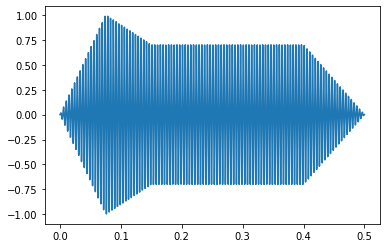

In [283]:
plt.plot(t[:4000], A)

In [284]:
scarborough_fair = np.concatenate((A_long, A, E, E, E, B, C, B, A_long))
play_song(scarborough_fair)

### Discussion 2

#### Problems Encountered

The biggest challenge for this task was determing the proper functions to represent each stage of the ADSR envelope. It was difficult to phrase the differences in the sound levels in terms of rise and run. However, we were able to figure it out with some trial and error. We also used a plot of the envelope function to troubleshoot and verify that the output was correct.

#### Results

We were able to envelope the notes and concatenate them together to produce the same song, this time with a better sound. 

#### Implementation Details

We chose to pick values for our envelope that approximated the given curve in the lab manual.

Here, we decided to remove the brief pause between notes, as the result of the ADSR enveloping allows each note to be heard distinctly. The brief rest also interferes with the next task in the lab.

**Question 2**

*How would you envelope with a decaying exponential?*

In much the same that we are using an array to communicate the stage of the ADSR envelope, we would also use an array which contains an exponential function that closely models the linear functions provided in the above implementation.

---
## Task 3 Overlapping notes
### Create two waves

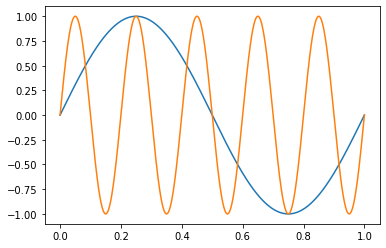

In [285]:
t = np.linspace(0,1,8000)
f = 1.0
note1=np.sin(2*np.pi*f*t)
plt.plot(t,note1)
f2 = 5.0
note2=np.sin(2*np.pi*f2*t)
plt.plot(t,note2)

### Add them together with zero-padding

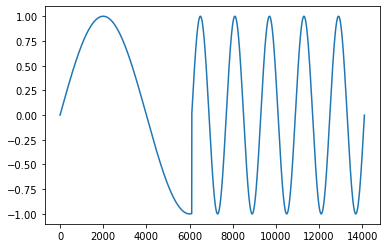

In [286]:
new_note = np.zeros(len(note1)+len(note2)-1900)
new_note[0:len(note1)] = note1
new_note[len(note1)-1900::] = note2
new_t = np.linspace(0,len(new_note),len(new_note))
plt.plot(new_t,new_note)

### Two notes without overlapping

In [287]:
note1 = notes[0]
note2 = notes[1]
sa.play_buffer((32767*note1).astype('int16'), 1, 2, 8000).wait_done()
sa.play_buffer((32767*note2).astype('int16'), 1, 2, 8000).wait_done()

### Two notes with overlapping

In [288]:
new_note = np.zeros(len(note1)+len(note2)-4000)
new_note[0:len(note1)] = note1
new_note[len(note1)-4000::] = note2
sa.play_buffer((32767*new_note).astype('int16'), 1, 2, 8000).wait_done()

### Group 1 Overlap Implementation

In [289]:

def overlap(arg1, *args):
    song = np.array([])
    song = np.append(song, arg1)
    length = len(arg1)
    delay_time = 0.2
    for arg in args:
        delay = int (delay_time * length)
        song[-1*delay:] = song[-1*delay:] + arg[0:delay]
        song = np.append(song, arg[delay:])
        length = len(arg)
    return np.tanh(song)

In [290]:
ab = overlap(A, B)

In [291]:
np.max(ab)

0.8229243177882305

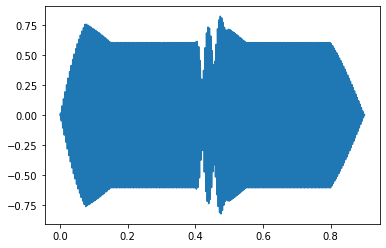

In [292]:
plt.plot(t[:7200], ab)

In [293]:
scarbs = overlap(A_long, A, E, E, E, B, C, B, A_long)

In [294]:
play_song(scarbs)

## Discussion 3

#### Problems Encountered

The output of the overlap function produced some values that exceeded the range [-1, 1]. This produced an undesirable static noise on the speaker. We were able to resolve this issue by applying a hyperbolic tangent function to the output of the overlap function, to ensure that all values are bounded by the range [-1, 1]. We used a graph and np.max to troubleshoot and verify the results.

#### Results

We were able to able to produce a high quality song by combining an overlap with the ADSR effect.

#### Implementation Details

We chose to write our own overlap function which does not pad the notes with zeros. Instead, it uses array slicing to add the *release* portion of one note with the *attack* portion of the next note. Our function also accepts a variable number of arguments, and behaves like the np.concatenate function.

**Question 3**

*To use overlapping notes, would you still use concatenation? How else would you do it?*

You would not use simple concatenation to have notes overlap.
The way we did it was to use the delay time for a given note, and to use array slicing to set the values of the total song from the end minus delay time to the end to the value of the last note in the song plus the next note in the song. We then appended the rest of the next note to the song.

*How would you use padding to construct the entire song?*

The results of using the padding method would be identical to the implementation that we came up with. In order overlap all of the notes in a song, we would write a similar method that uses the padding technique instead.
